# Creating a Basic Feedforward Neural Network for Classification

This notebook demonstrates how to build a basic feedforward neural network (FFNN) using Keras and TensorFlow for a classification task. We'll use a synthetic dataset for binary classification, but the concepts can be applied to other classification problems.

We'll cover:
- Generating a synthetic dataset
- Preprocessing the data
- Building the FFNN model
- Training and evaluating the model
- Making predictions

## Setup and Imports

Let's import the necessary libraries and set up the environment.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Generating Synthetic Dataset

We'll create a synthetic dataset with 1000 samples, 20 features, and 2 classes for binary classification.

In [2]:
# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (800, 20)
Testing data shape: (200, 20)


## Building the Feedforward Neural Network

We'll create a simple FFNN with:
- Input layer (20 features)
- Two hidden layers with 64 and 32 neurons (ReLU activation)
- Output layer with 1 neuron (sigmoid activation for binary classification)

In [3]:
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(20,)),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and summarize the model
model = create_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457 (13.50 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

We'll train the model for 50 epochs with a batch size of 32 and use 20% of the training data for validation.

In [7]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 0.8562 - val_loss: 0.5203
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.8562 - val_loss: 0.5227
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 0.8562 - val_loss: 0.5239
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.8625 - val_loss: 0.5266
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0049 - val_accuracy: 0.8562 - val_loss: 0.5285
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.8625 - val_loss: 0.5312
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8625 - val_loss: 0.5319
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.8625 - val_los

## Evaluating the Model

Let's evaluate the model's performance on the test set and visualize the training history.

Test accuracy: 0.8200


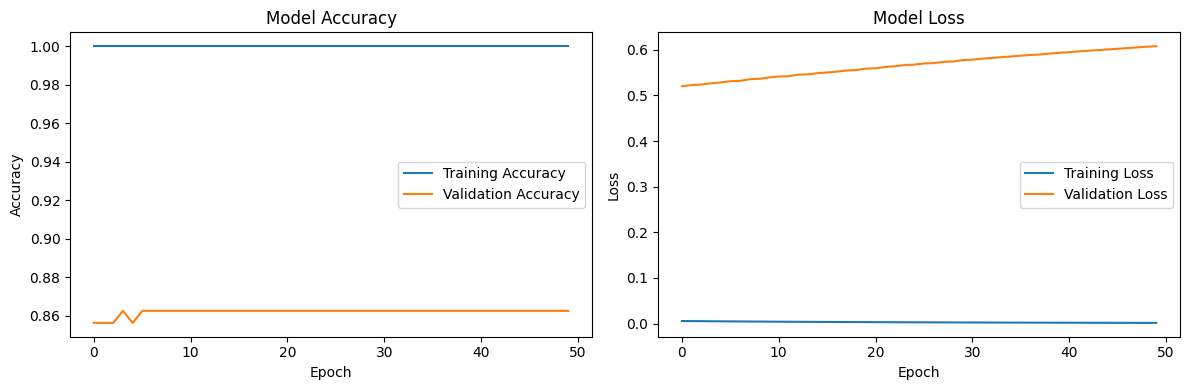

In [8]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('training_history.png')

## Making Predictions

Let's make predictions on the test set and examine some example outputs.

In [9]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Show some example predictions
print("\nExample Predictions:")
for i in range(5):
    print(f"Sample {i+1}: Predicted={predicted_classes[i]}, Actual={y_test[i]}, Probability={predictions[i][0]:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Example Predictions:
Sample 1: Predicted=1, Actual=1, Probability=0.9904
Sample 2: Predicted=1, Actual=1, Probability=0.7011
Sample 3: Predicted=0, Actual=1, Probability=0.2098
Sample 4: Predicted=1, Actual=1, Probability=0.9993
Sample 5: Predicted=1, Actual=1, Probability=0.9895


## Explanation

- **Dataset**: We used a synthetic dataset with 20 features and 2 classes, split into 80% training and 20% testing.
- **Model Architecture**: A simple FFNN with two hidden layers (64 and 32 neurons) and a sigmoid output layer for binary classification.
- **Training**: The model was trained with the Adam optimizer and binary crossentropy loss, monitoring accuracy.
- **Evaluation**: We plotted training/validation accuracy and loss to assess model performance and check for overfitting.
- **Predictions**: The model outputs probabilities, which we threshold at 0.5 to get class predictions.

This is a basic FFNN implementation. For real-world applications, you might want to:
- Add dropout layers to prevent overfitting
- Use hyperparameter tuning for optimal architecture
- Implement cross-validation
- Add early stopping to prevent overtraining